In [1]:
import numpy as np
import pandas as pd 
from sklearn import  preprocessing , cross_validation , neighbors



In [2]:
#k_neighbor

df=pd.read_csv(r"C:\Users\rehab\Desktop\breast-cancer.txt")



df.replace('?',-99999, inplace=True)

df.drop(['id'],1,inplace=True)

x = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

x_train,x_test,y_train,y_test=cross_validation.train_test_split(x,y,test_size=.2)
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)
accuracy=clf.score(x_test,y_test)

print(accuracy)


0.978571428571


In [3]:
#prediction
m=np.array([4,2,1,1,1,2,3,2,1])
print(clf.predict(m))

[2]


C:\Users\rehab\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


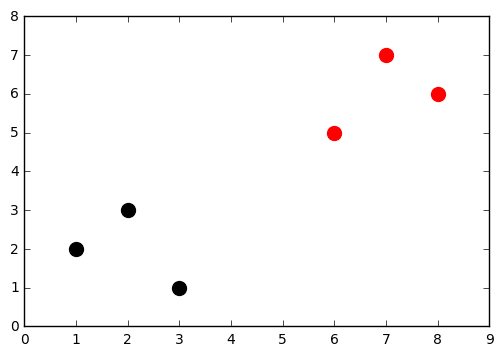

In [4]:
import matplotlib.pyplot as plt
import warnings
from math import sqrt
from collections import Counter
%matplotlib inline

dataset={'k':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]
[[plt.scatter(ii[0],ii[1],s=100 ,color=i)   for ii in dataset[i] ] for i in dataset]
plt.show()


In [39]:
def k_nearest_neighbors(data,predict,k=3):
    if len(data)>= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances=[]
    for group in data:
        for feature in data[group]:
            euclidean_distance=np.linalg.norm(np.array(feature)-np.array(predict))
            distances.append([euclidean_distance,group])
    #print(distances)
    #print(sorted(distances)[:k])
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(votes)
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result


result = k_nearest_neighbors(dataset, new_features,3)
print(result)
        
        

r


In [41]:
import random
full_data=df.astype(float).values.tolist()
random.shuffle(full_data)
size_test=.4
train_set={2:[],4:[]}
test_set={2:[],4:[]}
train_data=full_data[:-int(size_test*len(full_data))]
test_data=full_data[-int(size_test*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1]) 
    
correct=0
total=0
for group in test_set:
    for data in  test_set[group]:
        vote=k_nearest_neighbors(train_set,data ,k=5)
        if vote==group:
            correct+=1
        total+=1
        
        
print(correct/total)    
                           



0.956989247311828
